In [1]:
using Pkg, Revise
Pkg.activate("../GenLinAlgProblems/")
using GenLinAlgProblems, LinearAlgebra, RowEchelon, Latexify

using PyCall
itikz=pyimport("itikz")
nM   =pyimport("itikz.nicematrix")
jinja=pyimport("jinja2");

  Activating project at `C:\Users\jeff\NOTEBOOKS\elementary-linear-algebra\GenLinAlgProblems`
[ Info: Precompiling GenLinAlgProblems [3c0f76d2-298f-40a4-82ea-fb4356fbbd2d] 


<div style="float:center;width:100%;text-align:center;"><strong style="height:100px;color:darkred;font-size:40px;">Inverses</strong>
</div>

In [2]:
html"<iframe width=\"400\" height=\"200\" src=\"https://www.youtube.com/embed/u2bIV0qKibQ\"  frameborder=\"0\" allow=\"accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture\" allowfullscreen></iframe>"

HTML{String}("<iframe width=\"400\" height=\"200\" src=\"https://www.youtube.com/embed/u2bIV0qKibQ\"  frameborder=\"0\" allow=\"accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture\" allowfullscreen></iframe>")

# 1. The Inverse of a Square Matrix

**Notation:**

$\qquad \begin{align}
\alpha x = \beta  & \Leftrightarrow x = \alpha^{-1} \beta \quad \text{ provided } \alpha \ne 0 \\
A x = b           & \Leftrightarrow x = A^{-1} b \quad \text{ provided } A^{-1} \text{ exists} \\
\end{align}$

Consider the matrix

$\qquad A = \left( \begin{array}{rrr}
  1 &  1 &  2 \\
 -2 & -1 & -5 \\
  3 &  5 &  5 \\
\end{array} \right)
$

The reduced row echelon form of this matrix is $I$: thus
* $A$ has a **pivot in every row** and therefore **$\quad A x = b$ has a solution for <strong style="color:darkred;">any</strong> $\mathbf{b}$**.
* $A$ has a **pivot in every column**, and hence there are no free variables: **this solution is unique**.

Here is the idea:<br>
For any $b \in \mathbb{R}^3$ we can write

$\qquad
b = \begin{pmatrix} b_1\\b_2\\b_3 \end{pmatrix} =
b_1 \begin{pmatrix} 1\\   0\\   0 \end{pmatrix} +
b_2 \begin{pmatrix} 0\\   1\\   0 \end{pmatrix} +
b_3 \begin{pmatrix} 0\\   0\\   1 \end{pmatrix}
$

If we solve the three problems

$\qquad
A x_1 = \begin{pmatrix} 1\\   0\\   0 \end{pmatrix}, \quad
A x_2 = \begin{pmatrix} 0\\   1\\   0 \end{pmatrix}, \quad
A x_3 = \begin{pmatrix} 0\\   0\\   1 \end{pmatrix}, \quad \qquad\qquad (\text{Eq}_1) %\label{eq1}\tag{1}
$

we can rewrite the decomposition of $b$ as

$
b = b_1 A x_1 + b_2 A x_2 + b_3 A x_3 = A( b_1 x_1 + b_2 x_2 + b_3 x_3 ).
$

<div style="background-color:#F2F5A9;color:black;">
    We see that the solution of $A x = b$ for <b>any $b$ </b> is

$
\qquad {\color{red}{x = b_1 x_1 + b_2 x_2 + b_3 x_3 = X b}} \qquad\qquad (\text{Eq}_2) %  \label{eq2}\tag{2}
$

where the matrix $X$ is composed from the columns $x_1, x_2, x_3$:

$\qquad {\color{red}{X= \left( x_1\; x_2\; x_3 \right)}} \qquad\qquad\qquad\qquad\qquad (\text{Eq}_3) $

**We know that $A x = b$ has a solution for every $b$ iff it has a pivot in every row**:<br>
$\qquad$  idea can only work if the transformation $y = A x$ is **onto**.<br>
$\qquad$ If not, at least one of the vectors
    $x_1, x_2, x_3$ does not exist!
</div>

Let's try this: we **exploit the fact that we can solve for multiple right hand sides simultaneously:**
* augment $A$ by $I$
* solve for each of $x_1, x_2, x_3$
* assemble the matrix $X = \left( x_1\ x_2 \ x_3 \right)$
* assembling this matrix is error prone: for small matrices,<br>
we can **use Gauss Jordan** elimination
(rather than Gaussian Elimination for simplicity).

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">A has a pivot in every row</p>\n</div>")

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:12pt;\">Using GJ rather than GE for simplicity</p>\n</div>")

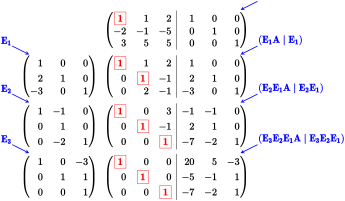

In [3]:
A= [ 1   1   2;
    -2  -1  -5;
     3   5   5]
# -----------------------------------------------------------------
# Run Gauss Jordan on [A I]
AI = [A Matrix(I, size(A,1), size(A,1))]

E1 = [1  0  0; 2 1 0; -3  0 1]; A1 = E1 * AI
E2 = [1 -1  0; 0 1 0;  0 -2 1]; A2 = E2 * A1
E3 = [1  0 -3; 0 1 1;  0  0 1]; A3 = E3 * A2
# -----------------------------------------------------------------
# Set up the Display for the Computational Layout
h,m = nM.ge( [[:none, AI],      # The matrices for GJ
              [   E1, A1],
              [   E2, A2],
              [   E3, A3]],
             pivot_list = [[(0,1),[(0,0)]],                # The list of pivots for each of the matrices
                           [(1,1),[(0,0),(1,1)]],
                           [(2,1),[(0,0),(1,1),(2,2)]],
                           [(3,1),[(0,0),(1,1),(2,2)]]],
             array_names=["E", ["A", "I"]],                # the matrix names to display
             Nrhs=3                                        # the paritioning line separating A from I
           )
# -----------------------------------------------------------------
# Show the computations
pr("A has a pivot in every row")
pr("Using GJ rather than GE for simplicity", sz=12)
h

----
Here is the reason for using GJ: **the back substitution is trivial** since $E_3 E_2 E_1 A = I$

$\qquad
x_1 = \left( \begin{array}{r} 20\\-5\\-7 \end{array} \right), \quad
x_2 = \left( \begin{array}{r} 5\\-1\\-2 \end{array} \right), \quad
x_3 = \left( \begin{array}{r} -7\\-2\\1 \end{array} \right)
$


It follows that for any $b = (b_1 \, b_2 \, b_3 )^t$, the **unique solution** is

$\qquad
x = b_1 \left( \begin{array}{r}  20\\-5\\-7 \end{array} \right) + b_2 \left( \begin{array}{r}  5\\-1\\-2 \end{array} \right) +  b_3 \left( \begin{array}{r}  -7\\-2\\1 \end{array} \right)
\Leftrightarrow x =
\left( \begin{array}{rrr} 20&5&-3\\-5&-1&1\\-7&-2&1 \end{array} \right) \left( \begin{array}{r} b_1\\b_2\\b_3 \end{array} \right)
$

---
If we name the matrices in the layout and write out the algebraic manipulations involved, the result is revealing:<br>

<div style="float:left;padding-right:1cm;padding-top:0.5cm;height:3.7cm;width:45%;">
<img src="Figs/inv_abstract3.svg" style="padding-left:2cm;width:7cm;">
</div>
<div style="float:left;height:3.7cm;width:45%;padding-left:1cm;padding-right:0.5cm;border-left:2px solid black;">
<!-- <img src="abstract_matrix_stack.svg" style="width:7cm;padding-left:10cm;"> -->
which corresponds to the algebraic equations<br>
$\quad
\begin{align}
(\xi) \Leftrightarrow &\; A X                      & =&\ I \\
      \Leftrightarrow &\; E_1 A X                  & =&\ E_1 \\
      \Leftrightarrow &\; E_2 E_1 A X              & =&\ E_2 E_1 \\
      \Leftrightarrow &\; {\color{red}{\mathbf{E_3 E_2 E_1}}}\ A X          & =&\ E_3 E_2 E_1 \\
      \Leftrightarrow &\; X                        & =&\ {\color{red}{\mathbf{E_3 E_2 E_1}}}
\end{align}
$
</div>

Since the matrix $A$ was row reduced to $I$, we have $X A = I$.

This is remarkable: we found the solution of the matrix problem $A X = I$,<br>
$\quad$ namely the product of the GE elementary matrices $X = E_3 E_2 E_1$<br>
$\quad$ by multiplying $A$ from the left
**by this same matrix** $X$ to obtain $X A = I$:<br><br>
$\quad$ **The solution $\mathbf{X}$ of $\; \color{red}{\mathbf{A\ X = I}}\;$ has the property that $\; \color{red}{\mathbf{X\ A = I}}\;$ holds as well!**<br>
$\quad$ Note that $X$ is a square matrix, and therefore $A$ must be square as well for this to hold.
    

<strong style="color:darkred;">This result holds for matrices $A$ of any size $N \times N$.</strong>

#### **Summary**

<div style="background-color:#F2F5A9;color:black">
Let $A$ be a square matrix

* there exists a **unique matrix** $X$ such that $A X = I$ and $X A = I$ iff $A$ has a **pivot in every row.**
* the matrix $X$ is a **product of elementary GE matrices.**
* the matrix $X$ is easily obtained by solving $A X = I$.

The matrix $X$ is called **the inverse of $\mathbf{A}$** and is written as $\mathbf{\color{red}{A^{-1}}}$.<br><br>
The construction of $X$ shows that exhibiting a square matrix $B$<br>
$\quad$ such that either $A B = I$ or $B A = I$
is sufficient to state that $B = A^{-1}$.
</div>

<div style="float:left;padding-right:1cm;">
 <br>

$$A\ =\ \left( \begin{array}{rrr}
  1 &  1 &  2 \\
 -2 & -1 & -5 \\
  3 &  5 &  5 \\
\end{array} \right) \quad\Leftrightarrow\quad A^{-1}\ =\ 
\left( \begin{array}{rrr} 20&5&-3\\-5&-1&1\\-7&-2&1 \end{array} \right)
$$
</div>
<div style="float:left;padding-left:1cm;border-left:2px solid black;">

To verify that these **square matrices** are inverses of each other,<br>
$\quad$ is **is sufficient** to check that either of these equalities hold:
* $A \  A^{-1} = I$
* $A^{-1} \  A = I$
</div>

#### **A Matrix That Does Not Have an Inverse**

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">A has a row without a pivot! None of the desired solutions exist</p>\n</div>")

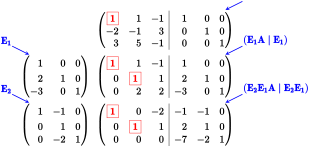

In [4]:
A= [ 1   1  -1;
    -2  -1   3;
     3   5  -1]
# -----------------------------------------------------------------
# Run Gauss Jordan on [A I]
AI = [A Matrix(I, size(A,1), size(A,1))]

E1 = [1  0  0; 2 1 0; -3  0 1]; A1 = E1 * AI
E2 = [1 -1  0; 0 1 0;  0 -2 1]; A2 = E2 * A1
# -----------------------------------------------------------------
# Set up the Display for the Computational Layout
h,m = nM.ge( [[:none, AI],      # The matrices for GJ
              [   E1, A1],
              [   E2, A2]],
             pivot_list = [[(0,1),[(0,0)]],                # The list of pivots for each of the matrices
                           [(1,1),[(0,0),(1,1)]],
                           [(2,1),[(0,0),(1,1)]]],
             array_names=["E", ["A", "I"]],                # the matrix names to display
             Nrhs=3                                        # the paritioning line separating A from I
           )
# -----------------------------------------------------------------
# Show the computations
pr("A has a row without a pivot! None of the desired solutions exist")
h

#### **Application**

The inverse matrix is **great for algebraic manipulations**:<br>
$\quad$ Given an invertible matrix $A$, we have

$\qquad
A x = b \Leftrightarrow A^{-1} A x = A^{-1} b \Leftrightarrow x = A^{-1} b. \qquad\qquad (\text{Eq}_4) %\label{eq4}\tag{4}
$

Numerically, however, it is **far preferable to solve $\mathbf{A x = b}$ directly.**<br>
$\quad$ For the case where we want to solve $A x = b$ repeatedly with different right hand sides,<br>
$\quad$ the reader is directed to the $LU$ decomposition formulation of GE.

---
Since we did compute the inverse of the matrix $A$ above, let's use it:

In [5]:
# Repeat the previous computations
    A  = [ 1 1 2; -2 -1 -5; 3 5 5]

    AI = [ A [1 0 0; 0 1 0; 0 0 1]]         # augment the matrix with I

    A1 = [1  0  0; 2 1 0; -3  0 1] * AI     # Gauss Jordan Elimination
    A2 = [1 -1  0; 0 1 0;  0 -2 1] * A1
    A3 = [1  0 -3; 0 1 1;  0  0 1] * A2
# ------------------------------------------------------------------------
# A reduced to I: we found the inverse as a product of elementary matrices
Ainverse = A3[:, 4:end]                  # Pivot in every row: we found the inverse

# ------------------------------------------------------------------------
# Solve A x = b for some vector b
b = [-3;4;-14]

# ------------------------------------------------------------------------
# BAD Idea (although it works!): using the inverse to solve A x = b
x = Ainverse*b

# ------------------------------------------------------------------------
println("The solution of A x = b using the inverse of A")
println("b               = $b")
println("x = A.inverse b = $x")
println()
println(raw"The solution of A x = b directly using a solver: A \ b")
println("x               = $(A\b)")

The solution of A x = b using the inverse of A
b               = [-3, 4, -14]
x = A.inverse b = [2, -3, -1]

The solution of A x = b directly using a solver: A \ b
x               = [2.0000000000000027, -3.000000000000001, -1.0000000000000007]


# 2. Left and Right Inverses

<div style="float:left;width:60%;">
Looking back at our first example,<br> we know that we can find vectors $x_1, x_2, x_3$ satisfying Eq(1)<br><strong>as long as we have a pivot in every row.</strong><br><br>
If $A$ is not square, it must therefore have more columns than rows,<br>
$\qquad$ i.e., there will be free variables: the <strong>solutions $\mathbf{x_1, \dots}$ will not be unique.</strong>

As long as we select any one solution, Eq(2) and Eq(3) will still hold,<br>
$\qquad$ and provide a particular solution for any right hand side $b$.<br><br>

To obtain **all solutions**, we only need to **add the solutions of the homogeneous equation** $\mathbf{A\ x_H = 0}$.
</div>
<div style="float:left;width:30%;padding-left:2cm;">
    <img src="Figs/RightInverse.svg" style="border:1px solid black;width:5cm;">
    <img src="Figs/RightInverseDNE.svg" style="border:1px solid black;width:5cm;">
</div>

Let's look at an example: let

$\qquad A = \left( \begin{array}{rrrr}
\ 1 & -1 & \ 2 & \ 3 \\
-3 & \ 4 & -4 & -8 \\
\ 2 & -3 & \ 3 & \ 6
 \end{array} \right),
$

and solve $A X = I$ as before

<!--
A = [ 1 -1 2 3; -3 4 -4 -8; 2 -3 3 6 ]
AI = [A Matrix(I, size(A,1), size(A,1))]
E1 = [1  0  0; 3  1  0; -2  0 1]; A1 = E1 * AI
E2 = [1  1  0; 0  1  0;  0  1 1]; A2 = E2 * A1
E3 = [1  0 -4; 0  1 -2;  0  0 1]; A3 = E3 * A2; X = A3[:,5:end]

pr("A has a pivot in every row<br/><p style=\"color:red;font-size:12pt\">Using GJ rather than GE for simplicity</p>")
#nM.ge( [[:none, AI], [E1, A1], [E2, A2], [E3, A3]], ((1,1),(2,2),(3,3)), to_str=LAcodes.pt_frac, col_divs=size(A,2))
matrices = [[ :none, to_latex_str.( AI   )],
                     to_latex_str.([E1 A1]),
                     to_latex_str.([E2 A2]),
                     to_latex_str.([E3 A3]) ]

 mat_rep, submatrix_locs, pivot_locs, path_corners, txt_with_locs,mat_format=nM.ge_layout_from_stacked(matrices,
        pivots=[], txt=[], Nrhs=3);

cmds = itikz.build_commands_dict(use_xetex=true,use_dvi=false,crop=true)
h=itikz.fetch_or_compile_svg( jinja.Template( nM.GE_TEMPLATE ).render(
        preamble=nM.preamble*raw"\NiceMatrixOptions{cell-space-top-limit = 3pt,cell-space-bottom-limit = 3pt}",
        extension=nM.extension,
        mat_rep=mat_rep,
        mat_format=mat_format,
        submatrix_locs=submatrix_locs, pivot_locs=pivot_locs, txt_with_locs=txt_with_locs),
        prefix="inv_",
        working_dir="/tmp/itikz",
        debug=false,
        keep_file="/tmp/itikz/inv_2",
        tex_program=cmds["tex_program"], svg_converter=cmds["svg_converter"],svg_crop=cmds["svg_crop"], nexec=1 );
h

<div>
<div style="width:100%;text-align:left;"><strong style="height:20px;color:blue;font-size:15px;">A has a pivot in every row</strong>
</div>
<div style="width:100%;text-align:left;"><strong style="height:12px;color:blue;font-size:12px;">Using GJ rather than GE for simplicity</strong>
</div>
</div>
<br>
-->

----
<div style="float:left;padding-right:1cm;padding-top:0cm;width:35%;">
<img src="Figs/inv_2.svg" style="padding-left:1cm;padding-right:1cm;">
<br><br>

There is indeed a **pivot in every row.**
</div>
<div style="float:left;width:55%;padding-left:1cm;border-left:2px solid black;">

To compute the usual particular solution, we <strong>set the free variable equal to zero.</strong>
$\quad$ The solution is
$$
X = \left( \begin{array}{rrr}
  0 & -3 & -4 \\
  1 & -1 & -2 \\
  1 &  1 &  1 \\
  0 &  0 &  0
\end{array} \right)
$$

We also can trivially read out the homogeneous solution
$$
x_H = \left( \begin{array}{r} 0 \\ 1 \\ -1 \\ 1\end{array} \right)
$$

Thus, any solution of $A x = b$ is given by $x = X b + x_H$
</div>

In [6]:
# The solution matrix is not unique
A = [1 -1 2 3; -3 4 -4 -8; 2 -3 3 6]
X = A \ Matrix(1I,3,3)

f(x) = round(x,digits=3)
latexify([ latex("X ="), f.(X)', latex("A * X ="), f.(A*X)' ]')

L"\begin{equation}
\left[
\begin{array}{cccc}
X = & \left[
\begin{array}{ccc}
0.0 & -3.0 & -4.0 \\
1.0 & -0.333 & -1.0 \\
1.0 & 0.333 & -0.0 \\
0.0 & 0.667 & 1.0 \\
\end{array}
\right] & A * X = & \left[
\begin{array}{ccc}
1.0 & 0.0 & 0.0 \\
-0.0 & 1.0 & -0.0 \\
0.0 & 0.0 & 1.0 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

----
Let us name the matrices in the layout and write out the algebraic manipulations as before:

<div style="float:left;padding-right:1cm;padding-top:0.5cm;height:3.7cm;width:45%;">
<img src="Figs/inv_abstract3.svg" style="padding-left:2cm;width:7cm;">
</div>
<div style="float:left;height:3.7cm;width:45%;padding-left:1cm;padding-right:0.5cm;border-left:2px solid black;">
<!-- <img src="abstract_matrix_stack.svg" style="width:7cm;padding-left:10cm;"> -->
which corresponds to the algebraic equations<br>
$\quad
\begin{align}
(\xi) \Leftrightarrow & A X                      & =& I \\
      \Leftrightarrow & E_1 A X                  & =& E_1 \\
      \Leftrightarrow & E_2 E_1 A X              & =& E_2 E_1 \\
      \Leftrightarrow & E_3 E_2 E_1 A X          & =& E_3 E_2 E_1 \\
      \Leftrightarrow & X    & =& E_3 E_2 E_1
\end{align}
$
</div>

This time, the matrix $A$ did not reduce to $I$, but to $I$ and some additional columns (one for each free variable).<br>
$\qquad$ **Removing the free variable columns** by setting the free variables to 0<br>
$\qquad$ reduces the problem to the square matrix case.

Since $A X = I$, the matrix $X$ is refered to as a **right inverse**.

---
How about a **left inverse**, i.e., a matrix $X$ such that $X A = I$?

We can transform this problem into a standard problem by taking the transpose: $X A = I \Leftrightarrow A^t X^t = I$.

#### **Summary**

<div style="background-color:#F2F5A9;color:black; width:65%;">
Let $A$ be a matrix of size $M \times N$.<br><br>

If $M \lt N$, $A$ has fewer rows than columns:
* $A$ has an infinite number of **right inverses** iff $A$ has a pivot in every row
* $A$ cannot have a **left inverse**
</div>

<div style="background-color:#F2F5A9;color:black;width:65%;">

If $M \gt N$, $A$ has more rows than columns:
* $A$ has an infinite number of **left inverses** iff $A$ has a pivot in every column
* $A$ does not have a **right inverse**
</div>

<div style="background-color:#F2F5A9;color:black;width:65%;">

If $M = N$, $A$ is a square matrix:
* $A$ has a unique left inverse iff $A$ has a pivot in every row (and hence every column)
* $A$ has a unique right inverse iff $A$ has a pivot in every column (and hence every row)
* If they exist, the **left and right inverses are the same:** the inverse $A^{-1}$ of $A$.
</div>

Let $A$ be a square matrix. Assume it has two inverses $B$ and $C$. Then

$\qquad\begin{align}
(\xi) & \Leftrightarrow A B   &=&\ I \quad & \text{ since } B = A^{-1} \\
      & \Leftrightarrow C A B &=&\ C       & \text{ multiply by } C \text{ from the left} \\
      & \Leftrightarrow B     &=&\ C       & \text{ since } C^{-1} = A, \text{ so that } C A = I
\end{align}$

# 3. Take Away

* Let $A$ be a matrix of size $N \times N$,<br>
    * then $A$ has an inverse $A^{-1}$  $\quad$ iff $\quad$  $A A^{-1} = A^{-1} A = I$<br><br>
    * If such a matrix exists, **it is unique**<br><br>
    * To check whether a square matrix $B$ of size $N \times N$ is the inverse of $A$,<br>
        $\quad$ it is sufficient to check one of the products $A B = I$ or $B A = I$.<br><br>
    * If $A$ is not square, e.g., of sixe $M \times N$, where $M \ne N$,<br>
    $\quad$ we may have either a **left inverse** or a **right inverse** $B$ (but not both):<br>
        * If $M > N$, we may have an infinite number of solutions for $X A = I$ (such a matrix $X$ is a **left inverse**)<br>
        * If $M < N$, we may have an infinite number of solutions for $A X = I$ (such a matrix $X$ is a **right inverse**)

* A **square** matrix $A$ has an inverse iff $A$ has **a pivot in every column**
    * To compute the inverse, we need to **solve** $\mathbf{A X = I},$<br>
    $\quad$ which is equivalent to solving $A x_i = e_i, i = 1,2, \dots n,$<br>
    $\quad$ where $e_i$ is the $i^{th}$ column of $I$. The solution $x_i$ is the $i^{th}$ column of the inverse. 

* Using the inverse in **numerical computations** is a bad idea, and is not usually needed in practice.
    * If $A$ has an inverse, we obtain the **unique solution** of $A x = b$ by multiplying with $A^{i}$ from the left:
    $$A x = b \Leftrightarrow x = A^{-1} b$$.

* If a matrix $A$ of size $N \times N$ is **invertible**, $A x = b$ has a unique solution for every vector $b \in \mathbb{R}^N$.